# Анализ системы метрик приложения

Вы — продуктовый аналитик приложения Procrastinate Pro+, которое предоставляет пользователям доступ к развлекательному контенту: видео, подкастам и блогам. Пользователи могут выбрать несколько пакетов контента. Пакеты различаются по цене, объёму и содержанию.

К началу лета в приложении появился новый вид контента — спортивный. С его помощью менеджеры стремятся расширить аудиторию, добавив в неё пользователей, которые увлекаются спортом и здоровым образом жизни.

К запуску нового контента была скорректирована маркетинговая стратегия привлечения пользователей. Согласно бизнес-модели продукта, привлечение должно окупиться за первые 28 дней (4 недели).

После запуска нового контента и изменения стратегии интерес к продукту в целом вырос, но выручка начала стагнировать. Нужно разобраться, почему это происходит.

Ваши задачи:
- провести анализ юнит-экономики продукта в динамике за первые 28 дней;
- разобраться в причинах стагнации выручки;
- определить, какие источники привлечения приносят прибыль, а какие не выходят на уровень окупаемости;
- дать рекомендации отделу маркетинга.


### Данные

В вашем распоряжении есть данные о посещениях приложения, покупках и расходах на маркетинг.
Данные собраны в трёх датасетах.

1. Датасет `ppro_visits.csv` — информация о посещениях приложения пользователями, которые зарегистрировались с 1 апреля 2024 года по 30 ноября 2024 года:
    - `user_id` — уникальный идентификатор пользователя;
    - `region` — страна пользователя;
    - `device` — категория устройства пользователя;
    - `channel` — идентификатор рекламного источника, из которого пришёл пользователь;
    - `session_start` — дата и время начала сессии;
    - `session_end` — дата и время окончания сессии.

2. Датасет `ppro_orders.csv` — информация о покупках:
    - `user_id` — уникальный идентификатор пользователя, который сделал покупку;
    - `event_dt` — дата и время покупки;
    - `revenue` — выручка.

3. Датасет `ppro_costs.csv` — информация о затратах на маркетинг:
    - `dt` — дата
    - `channel` — идентификатор рекламного источника;
    - `costs` — затраты на этот рекламный источник в этот день.
    
### План проекта
- Загрузить и предобработать данные.
- Подготовить данные для когортного анализа.
- Рассчитать и проанализировать метрики вовлечённости в продукт.
- Рассчитать и проанализировать финансовые метрики CAC, LTV и ROI за первые 28 дней с момента привлечения.
- Исследовать метрики в разрезе источника привлечения.
- Рассчитать период окупаемости маркетинговых вложений.
- Сформулировать выводы и рекомендации.


## Загрузка и предобработка данных

Загрузите данные и получите основную информацию о них. Проведите необходимую предобработку. Основную информацию о данных и предобработке зафиксируйте в кратком промежуточном выводе.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as mcolors

In [2]:
df_visits = pd.read_csv('https://code.s3.yandex.net/datasets/ppro_visits.csv')
df_orders = pd.read_csv('https://code.s3.yandex.net/datasets/ppro_orders.csv')
df_costs = pd.read_csv('https://code.s3.yandex.net/datasets/ppro_costs.csv')

In [3]:
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161865 entries, 0 to 161864
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        161865 non-null  int64 
 1   region         161865 non-null  object
 2   device         161865 non-null  object
 3   channel        161865 non-null  object
 4   session_start  161865 non-null  object
 5   session_end    161865 non-null  object
dtypes: int64(1), object(5)
memory usage: 7.4+ MB


In [4]:
df_visits.head(5)

,user_id,region,device,channel,session_start,session_end
0,631105188566,India,desktop,MediaTornado,2024-04-01 03:48:00,2024-04-01 04:19:00
1,892885906464,India,tv,RocketSuperAds,2024-04-01 00:47:00,2024-04-01 01:14:00
2,517003690029,India,mobile,MediaTornado,2024-04-01 17:31:00,2024-04-01 17:53:00
3,185156659289,India,mobile,MediaTornado,2024-04-01 14:36:00,2024-04-01 14:51:00
4,409503040345,India,mobile,RocketSuperAds,2024-04-01 08:25:00,2024-04-01 08:45:00


In [5]:
df_visits.isna().sum()

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

In [6]:
df_visits.duplicated().sum()

0

В таблице df_visits - нет пропусков и дубликатов.

In [7]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33893 entries, 0 to 33892
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   33893 non-null  int64  
 1   event_dt  33893 non-null  object 
 2   revenue   33893 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 794.5+ KB


In [8]:
df_orders.head(5)

,user_id,event_dt,revenue
0,771951256319,2024-04-01 05:56:26,2.99
1,829942381059,2024-04-01 14:55:02,2.99
2,727879856738,2024-04-01 22:15:09,14.99
3,481270888930,2024-04-01 06:05:14,2.99
4,844695029762,2024-04-01 01:19:52,2.99


In [9]:
df_orders.duplicated().sum()

0

В таблице df_orders - нет пропусков и дубликатов.

In [10]:
df_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       976 non-null    object 
 1   channel  976 non-null    object 
 2   costs    976 non-null    float64
dtypes: float64(1), object(2)
memory usage: 23.0+ KB


In [11]:
df_costs.head(5)

,dt,channel,costs
0,2024-04-01,FaceBoom,124.938874
1,2024-04-02,FaceBoom,88.147779
2,2024-04-03,FaceBoom,120.779457
3,2024-04-04,FaceBoom,98.981253
4,2024-04-05,FaceBoom,109.044760


In [12]:
df_costs.duplicated().sum()

0

В таблице df_costs - нет пропусков и дубликатов.

In [13]:
# преобразуем данные о времени
df_visits['session_start'] = pd.to_datetime(df_visits['session_start'])
df_visits['session_end'] = pd.to_datetime(df_visits['session_end'])
df_orders['event_dt'] = pd.to_datetime(df_orders['event_dt'])
df_costs['dt'] = pd.to_datetime(df_costs['dt'])

In [14]:
#проверим результат преобразования даты
df_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       976 non-null    datetime64[ns]
 1   channel  976 non-null    object        
 2   costs    976 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 23.0+ KB


In [15]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33893 entries, 0 to 33892
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   33893 non-null  int64         
 1   event_dt  33893 non-null  datetime64[ns]
 2   revenue   33893 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 794.5 KB


In [16]:
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161865 entries, 0 to 161864
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        161865 non-null  int64         
 1   region         161865 non-null  object        
 2   device         161865 non-null  object        
 3   channel        161865 non-null  object        
 4   session_start  161865 non-null  datetime64[ns]
 5   session_end    161865 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 7.4+ MB


**Вывод:** 
В данном разделе мы познакомились с таблицами `df_visits`,`df_orders`,`df_costs`. Проверили данные на пропуски и дубликаты - в таблицах нет пропусков и дубликатов.
пПреобразовав столбцы `session_start`,`session_end`,`event_dt`,`dt` в формат datetime64.

## Подготовка данных к когортному анализу

Подготовьте данные к когортному анализу с учётом того, что вы будете изучать окупаемость привлечения пользователей за первые 28 дней.

Для каждого пользователя найдите:
- дату первой сессии (дата привлечения пользователя, `first_dt`);
- канал привлечения (`first_channel`);
- стоимость привлечения пользователя (`cac`).

Результаты сохраните в новой таблице, например, `profiles`.

Добавьте к данным с событиями и покупками информацию о первом источнике привлечения и дату привлечения пользователя из созданной таблицы. После этого рассчитайте дневной лайфтайм для каждого события или покупки и добавьте в таблицу в виде целого числа. В дальнейшем при проведении когортного анализа используйте информацию о первом источнике привлечения пользователя.

In [17]:
# 1. Дата первой сессии и канал привлечения
# Сначала сортируем данные по user_id и session_start
df_visits_sorted = df_visits.sort_values(['user_id', 'session_start'])

# Затем группируем и находим первую дату и канал для каждого пользователя
df_visits_sorted['first_dt'] = df_visits_sorted.groupby('user_id')['session_start'].transform('min')
df_visits_sorted['first_channel'] = df_visits_sorted.groupby('user_id')['channel'].transform('first')

# Создаем таблицу profiles, удаляя дубликаты
profiles = df_visits_sorted[['user_id', 'first_dt', 'first_channel']].drop_duplicates()

# 2. Расчет CAC

# a. Сколько уникальных пользователей привлекалось по каждому каналу привлечения каждый день
new_users = df_visits_sorted.groupby([df_visits_sorted['first_dt'].dt.date, 'first_channel'])['user_id'].nunique().reset_index()
new_users.rename(columns={'first_dt': 'dt', 'user_id': 'new_users'}, inplace=True)
new_users['dt'] = pd.to_datetime(new_users['dt']).dt.date

# b. Добавляем эту информацию к таблице с затратами на маркетинг
costs_agg = df_costs.groupby(['dt', 'channel'])['costs'].sum().reset_index()
costs_agg['dt'] = pd.to_datetime(costs_agg['dt']).dt.date

cac_data = pd.merge(costs_agg, new_users, left_on=['dt', 'channel'], right_on=['dt', 'first_channel'], how='left')
cac_data.drop('first_channel', axis=1, inplace=True)

# c. Подсчитываем для каждого канала сколько стоило привлечение одного пользователя каждый день
cac_data['new_users'] = cac_data['new_users'].fillna(0)
cac_data['cac'] = cac_data['costs'] / cac_data['new_users']
cac_data['cac'] = cac_data['cac'].replace([float('inf'), float('-inf')], 0)

# d. Добавляем новые данные к таблице profiles
profiles['first_dt'] = profiles['first_dt'].dt.date
profiles = pd.merge(
    profiles, 
    cac_data[['dt', 'channel', 'cac']], 
    left_on=['first_dt', 'first_channel'], 
    right_on=['dt', 'channel'], 
    how='left'
)
profiles = profiles.drop(['dt', 'channel'], axis=1)
profiles['cac'] = profiles['cac'].fillna(0)
profiles['first_dt'] = pd.to_datetime(profiles['first_dt'])

# Выводим первые 5 строк
profiles.head(5)

,user_id,first_dt,first_channel,cac
0,26034876,2024-05-29,FaceBoom,0.953250
1,69890364,2024-06-28,RocketSuperAds,0.604917
2,75610104,2024-06-09,FaceBoom,1.196159
3,76692397,2024-10-21,FaceBoom,1.147967
4,80224421,2024-06-21,FaceBoom,1.208981


In [18]:
# Добавление информации о первом источнике и дате привлечения к данным о событиях

# 1. К df_visits
df_visits = df_visits.merge(profiles[['user_id', 'first_dt', 'first_channel']], on='user_id', how='left')

# Рассчитываем lifetime для df_visits
df_visits['lifetime'] = (df_visits['session_start'] - df_visits['first_dt']).dt.days
df_visits['lifetime'] = df_visits['lifetime'].astype(int)  # Преобразуем в целое число

# 2. К df_orders
df_orders = df_orders.merge(profiles[['user_id', 'first_dt', 'first_channel']], on='user_id', how='left')
df_orders['first_dt'] = pd.to_datetime(df_orders['first_dt'])

# Рассчитываем lifetime для df_orders
df_orders['lifetime'] = (df_orders['event_dt'] - df_orders['first_dt']).dt.days
df_orders['lifetime'] = df_orders['lifetime'].astype(int)  # Преобразуем в целое число

# Вывод первых нескольких строк обновленных таблиц
display("Обновленная таблица visits:")
display(df_visits.head())
display("Обновленная таблица orders:")
display(df_orders.head())

'Обновленная таблица visits:'

,user_id,region,device,channel,session_start,session_end,first_dt,first_channel,lifetime
0,631105188566,India,desktop,MediaTornado,2024-04-01 03:48:00,2024-04-01 04:19:00,2024-04-01,MediaTornado,0
1,892885906464,India,tv,RocketSuperAds,2024-04-01 00:47:00,2024-04-01 01:14:00,2024-04-01,RocketSuperAds,0
2,517003690029,India,mobile,MediaTornado,2024-04-01 17:31:00,2024-04-01 17:53:00,2024-04-01,MediaTornado,0
3,185156659289,India,mobile,MediaTornado,2024-04-01 14:36:00,2024-04-01 14:51:00,2024-04-01,MediaTornado,0
4,409503040345,India,mobile,RocketSuperAds,2024-04-01 08:25:00,2024-04-01 08:45:00,2024-04-01,RocketSuperAds,0


'Обновленная таблица orders:'

,user_id,event_dt,revenue,first_dt,first_channel,lifetime
0,771951256319,2024-04-01 05:56:26,2.99,2024-04-01,FaceBoom,0
1,829942381059,2024-04-01 14:55:02,2.99,2024-04-01,FaceBoom,0
2,727879856738,2024-04-01 22:15:09,14.99,2024-04-01,FaceBoom,0
3,481270888930,2024-04-01 06:05:14,2.99,2024-04-01,TipTop,0
4,844695029762,2024-04-01 01:19:52,2.99,2024-04-01,FaceBoom,0


## Анализ месячной динамики основных метрик продукта

**Задача 1**. Начните анализ данных с изучения динамики активности пользователей и их вовлечённости в продукт. Рассчитайте по всем данным значения DAU, MAU и Stickiness и визуализируйте их. Активными считайте всех пользователей, которые взаимодействовали с приложением.

**Задача 2**. В разрезе каждого месяца привлечения новых пользователей рассчитайте:
- Среднюю стоимость привлечения пользователя (CAC).
- Значение LTV и ROI с учётом покупок, совершённых за 28 дней с момента привлечения.

Здесь и далее при расчёте LTV и ROI учитывайте всех привлечённых пользователей когорты.

Визуализируйте метрики и сформулируйте небольшой промежуточный вывод. Сделайте акцент на общей динамике изменения метрик с учётом появления нового контента в начале лета.

Изучим динамику активности пользователей и их вовлечённости в продукт. 

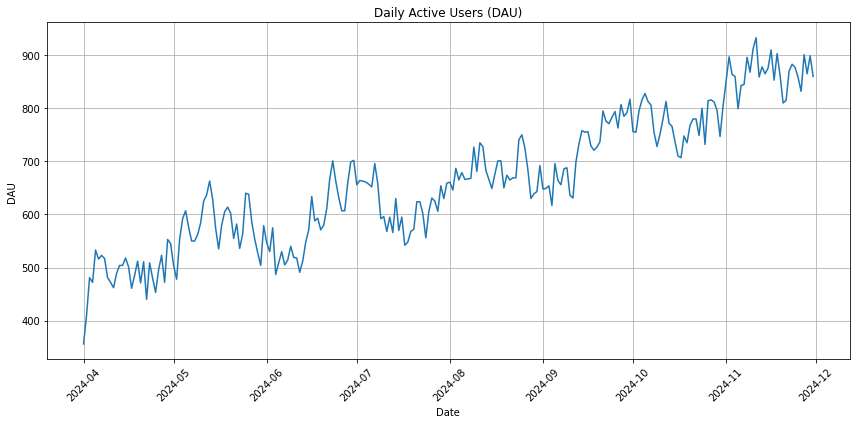

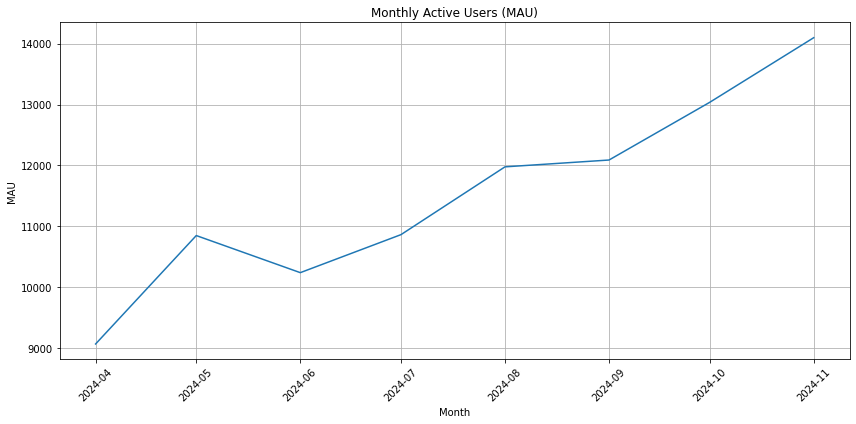

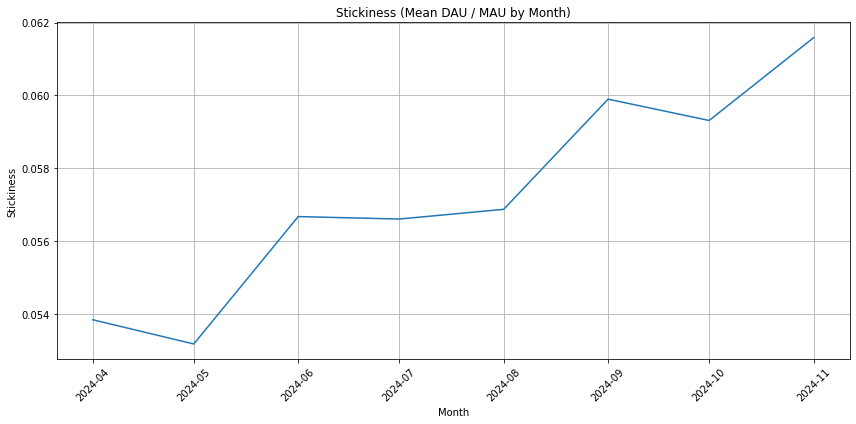

In [19]:
# 1. Расчет DAU (Daily Active Users)
dau = df_visits.groupby(df_visits['session_start'].dt.date)['user_id'].nunique()
dau = dau.reset_index()
dau.columns = ['date', 'dau']

# 2. Расчет MAU (Monthly Active Users)
mau = df_visits.groupby(df_visits['session_start'].dt.to_period('M'))['user_id'].nunique()
mau = mau.reset_index()
mau.columns = ['month', 'mau']
mau['month'] = mau['month'].dt.to_timestamp()

# 3. Расчет Stickiness (DAU/MAU) - теперь на месячном уровне
# Сначала добавим месяц к данным DAU
dau['month'] = pd.to_datetime(dau['date']).dt.to_period('M')

# Рассчитаем средний DAU по месяцам
monthly_dau = dau.groupby('month')['dau'].mean().reset_index()
monthly_dau['month'] = monthly_dau['month'].dt.to_timestamp()

# Объединяем средний DAU и MAU для расчета Stickiness
stickiness_data = pd.merge(
    monthly_dau, 
    mau, 
    on='month', 
    how='left'
)
stickiness_data['stickiness'] = stickiness_data['dau'] / stickiness_data['mau']

# Визуализация DAU (оставляем дневной график)
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='dau', data=dau)
plt.title('Daily Active Users (DAU)')
plt.xlabel('Date')
plt.ylabel('DAU')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Визуализация MAU (оставляем месячный график)
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='mau', data=mau)
plt.title('Monthly Active Users (MAU)')
plt.xlabel('Month')
plt.ylabel('MAU')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Визуализация Stickiness (теперь по месяцам)
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='stickiness', data=stickiness_data)
plt.title('Stickiness (Mean DAU / MAU by Month)')
plt.xlabel('Month')
plt.ylabel('Stickiness')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Вывод:** 

- DAU (Daily Active Users): Наблюдается общая тенденция к росту DAU. Это говорит о том, что количество пользователей, которые взаимодействуют с продуктом каждый день, увеличивается со временем. Этот рост – положительный сигнал и может указывать на успех продукта, улучшение его характеристик или успешное продвижение.

- MAU (Monthly Active Users): Динамика MAU демонстрирует более сложную картину:
Рост в мае.Снижение (падение) в период с мая по июнь.
Последующий рост MAU с июня до ноября (до конца рассматриваемого периода).
Эта динамика показывает, что продукт привлекает новых пользователей, но также испытывает отток (отток пользователей, снижение в мае-июне), после чего наблюдается устойчивый рост. Падение в мае-июне может быть связано с сезонностью, изменениями в продукте, маркетинговой активности или другими факторами. Устойчивый рост в последующие месяцы, демонстрирует способность продукта удерживать и привлекать пользователей, что является положительным сигналом.

- Stickiness (DAU/MAU): Динамика Stickiness указывает на изменения в вовлеченности пользователей:
Заметный скачок роста в мае.
В целом, наблюдается тенденция к увеличению Stickiness. Это самый важный вывод, т.к. говорит о том, что пользователи не просто возвращаются к продукту, но и чаще используют его каждый день (или более активно вовлечены). Повышение Stickiness — ключевой показатель успеха. 

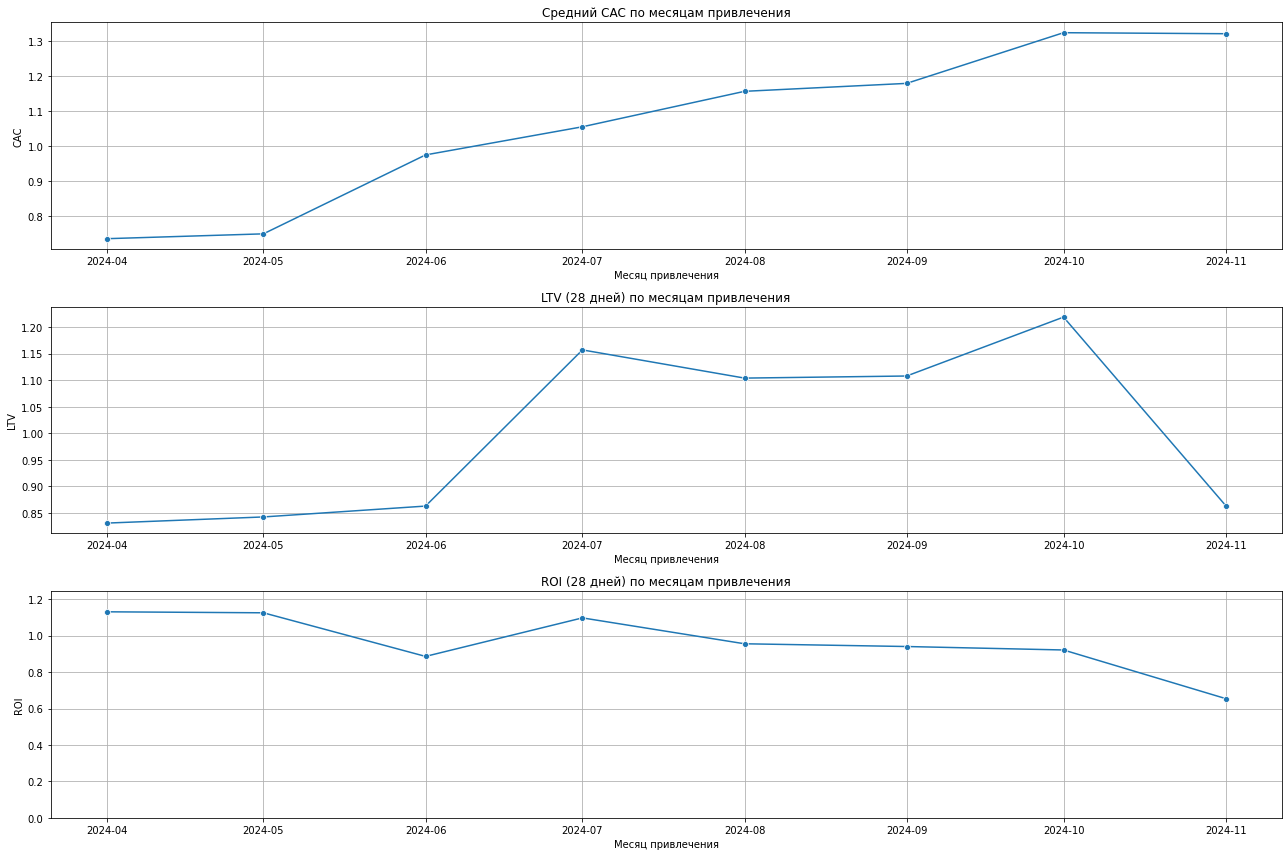

Анализируемые месяцы: <PeriodArray>
['2024-05', '2024-06', '2024-10', '2024-07', '2024-09', '2024-08', '2024-04',
 '2024-11']
Length: 8, dtype: period[M]
  cohort_month   avg_cac  user_id   revenue       ltv       roi
0   2024-04-01  0.734706     9069   7535.30  0.830885  1.130908
1   2024-05-01  0.748572     9789   8246.98  0.842474  1.125441
2   2024-06-01  0.973978     8719   7524.10  0.862954  0.886010
3   2024-07-01  1.054344     8742  10115.59  1.157125  1.097483
4   2024-08-01  1.155601     9518  10508.12  1.104026  0.955369
5   2024-09-01  1.178301     9198  10191.07  1.107966  0.940308
6   2024-10-01  1.323047     9520  11604.24  1.218933  0.921308
7   2024-11-01  1.320148    10301   8899.96  0.863990  0.654464


In [20]:
# Месяц привлечения
profiles['cohort_month'] = profiles['first_dt'].dt.to_period('M')
df_orders['cohort_month'] = df_orders['first_dt'].dt.to_period('M')

# Определяем cutoff_date - последняя дата минус 28 дней
cutoff_date = df_orders['event_dt'].max() - pd.Timedelta(days=28)

# Фильтруем только когорты, где first_dt <= cutoff_date
valid_cohorts = profiles[profiles['first_dt'] <= cutoff_date]['cohort_month'].unique()

# Применяем фильтрацию ко всем данным
profiles_filtered = profiles[profiles['cohort_month'].isin(valid_cohorts)]
df_orders_filtered = df_orders[df_orders['cohort_month'].isin(valid_cohorts)]

# 2. LTV за 28 дней (только для отфильтрованных данных)
df_orders_28d = df_orders_filtered[df_orders_filtered['lifetime'] <= 28]
monthly_revenue = df_orders_28d.groupby('cohort_month')['revenue'].sum().reset_index()

# 3. CAC по месяцам (корректный расчет среднего)
monthly_users = profiles_filtered.groupby('cohort_month')['user_id'].nunique().reset_index()
monthly_cac = profiles_filtered.groupby('cohort_month')['cac'].sum().reset_index()
monthly_cac = pd.merge(monthly_cac, monthly_users, on='cohort_month')
monthly_cac['avg_cac'] = monthly_cac['cac'] / monthly_cac['user_id']

# 4. Объединение данных с проверкой на отсутствие значений
monthly_metrics = pd.merge(
    monthly_cac[['cohort_month', 'avg_cac', 'user_id']],
    monthly_revenue[['cohort_month', 'revenue']],
    on='cohort_month',
    how='left'
).fillna(0)

# Более надежный расчет LTV и ROI
monthly_metrics['ltv'] = monthly_metrics.apply(
    lambda x: x['revenue'] / x['user_id'] if x['user_id'] > 0 else 0,
    axis=1
)
monthly_metrics['roi'] = monthly_metrics.apply(
    lambda x: x['ltv'] / x['avg_cac'] if x['avg_cac'] > 0 else 0,
    axis=1
)

# Преобразование дат и визуализация
monthly_metrics['cohort_month'] = monthly_metrics['cohort_month'].dt.to_timestamp()

# Визуализация с ограничением оси Y для ROI
plt.figure(figsize=(18, 12))

# График CAC
plt.subplot(3, 1, 1)
sns.lineplot(x='cohort_month', y='avg_cac', data=monthly_metrics, marker='o')
plt.title('Средний CAC по месяцам привлечения')
plt.xlabel('Месяц привлечения')
plt.ylabel('CAC')
plt.grid(True)

# График LTV
plt.subplot(3, 1, 2)
sns.lineplot(x='cohort_month', y='ltv', data=monthly_metrics, marker='o')
plt.title('LTV (28 дней) по месяцам привлечения')
plt.xlabel('Месяц привлечения')
plt.ylabel('LTV')
plt.grid(True)

# График ROI с разумными пределами
plt.subplot(3, 1, 3)
ax = sns.lineplot(x='cohort_month', y='roi', data=monthly_metrics, marker='o')
plt.title('ROI (28 дней) по месяцам привлечения')
plt.xlabel('Месяц привлечения')
plt.ylabel('ROI')
plt.ylim(0, monthly_metrics['roi'].max() * 1.1)  # Ограничиваем ось Y
plt.grid(True)

plt.tight_layout()
plt.show()

# Вывод отфильтрованных данных
print("Анализируемые месяцы:", valid_cohorts)
print(monthly_metrics)


**Вывод:**

- CAC (Customer Acquisition Cost):
Наблюдается активный рост CAC начиная с мая. Это означает, что стоимость привлечения одного пользователя значительно увеличивается.
- LTV (Lifetime Value):
Рост LTV с июня по июль: Это говорит о том, что пользователи, привлеченные в июне и июле, приносят больше дохода в течение своего “жизненного цикла”. Это положительный знак.
- ROI (Return on Investment):
Спад с мая по июнь: Этот спад подтверждает ваши наблюдения о росте CAC. Если CAC растет, а LTV остается прежним (или растет незначительно), то ROI неизбежно снижается. Это означает, что маркетинговые инвестиции становятся менее эффективными.
Небольшой рост с июня по июль: Этот небольшой рост, вероятно, связан с ростом LTV в этот период. Увеличение LTV компенсировало рост CAC, что привело к улучшению ROI.
Падение с июля до ноября: Это, вероятно, является следствием сочетания нескольких факторов:
Дальнейший рост CAC, который перекрывает любой потенциальный рост LTV.
Снижение LTV, которое мы наблюдали ранее, у пользователей, привлеченных после октября.


Сводка ключевых моментов:

- Рост DAU и Stickiness: Продукт привлекает и удерживает пользователей (в целом).
- Рост CAC: Привлечение пользователей становится дороже.
- Рост и последующее падение LTV: Пользователи, привлеченные летом, приносили больше дохода, но эта тенденция не сохранилась.
- Падение ROI: Инвестиции в маркетинг становятся менее эффективными.

Общие гипотезы о причинах стагнации выручки, учитывая всю доступную информацию:

- “Спортивная” аудитория не монетизируется так же хорошо, как “старая”:
Более низкая платежеспособность: Спортивные пользователи могут быть менее склонны тратить деньги на платные функции или контент в приложении.
Иной профиль потребления контента: Они, возможно, используют приложение в основном для бесплатного спортивного контента и не интересуются другими платными предложениями.
- Запуск спортивного контента мог негативно повлиять на “старую” аудиторию:
Отток пользователей: “Старая” аудитория могла почувствовать, что приложение меняет направление и уйти.
Снижение вовлеченности: “Старая” аудитория могла начать меньше времени проводить в приложении и меньше тратить денег из-за переключения внимания на спортивный контент.
- Неэффективность маркетинговой стратегии после запуска спортивного контента:
Неправильный таргетинг: Маркетинговые кампании привлекают пользователей, которые интересуются только бесплатным спортивным контентом.
Высокий CAC без соответствующего LTV: Привлечение спортивной аудитории обходится дорого, но не приносит достаточного дохода.
- Сезонность или внешние факторы:
Влияние сезонности на активность пользователей и их траты (падение с октября может быть связано с сезонным снижением активности).
- Влияние экономических факторов (общее снижение покупательской способности).

## Анализ метрик в разрезе источника привлечения

Теперь необходимо разобраться, какие источники привлечения перспективны, а какие за 28 дней не окупились.

**Задача 1**. Определите самые популярные источники привлечения:
- Посчитайте общее число привлечённых пользователей для каждого источника.
- Визуализируйте динамику набора новых пользователей по дням в каждом источнике.
- Рассчитайте и визуализируйте динамику DAU, MAU и Stickiness по источникам привлечения.

**Задача 2**. Изучите динамику изменения метрик на 28-й день в разрезе источника. Проведите анализ с выделением недельных когорт по дате привлечения. Рассчитайте и визуализируйте:
- Скользящее удержание на 14-й день с момента привлечения (за период с 14-го по 28-й день).
- Конверсию в покупку.

Недельную динамику затрат на маркетинг по каждому источнику привлечения.
Динамику среднего CAC, значений LTV и ROI.

По результатам проведите анализ рекламных каналов. Дайте общую характеристику каждому рекламному каналу по рассчитанным метрикам. Укажите, какие рекламные каналы не вышли на уровень окупаемости за ожидаемый период, и предположите почему.


Общее число привлечённых пользователей по каждому источнику:
 channel
FaceBoom          29109
TipTop            18709
RocketSuperAds    14972
MediaTornado      14804
Name: user_id, dtype: int64


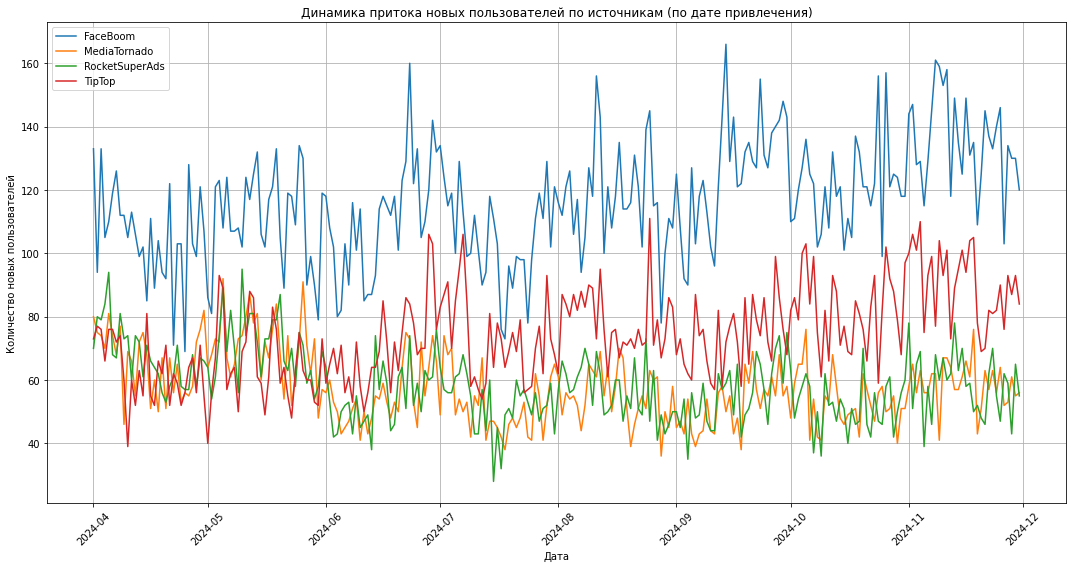

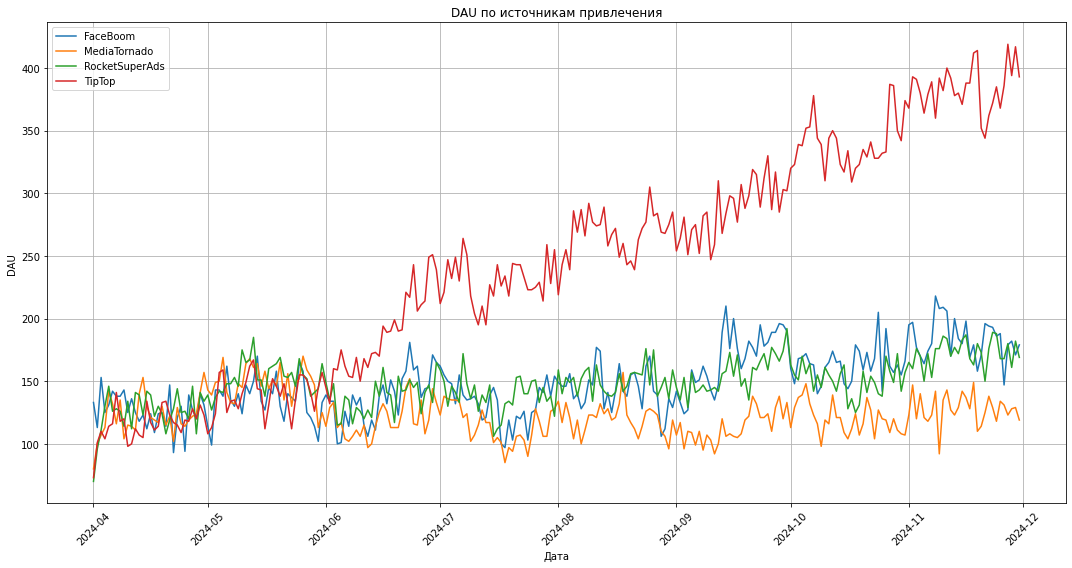

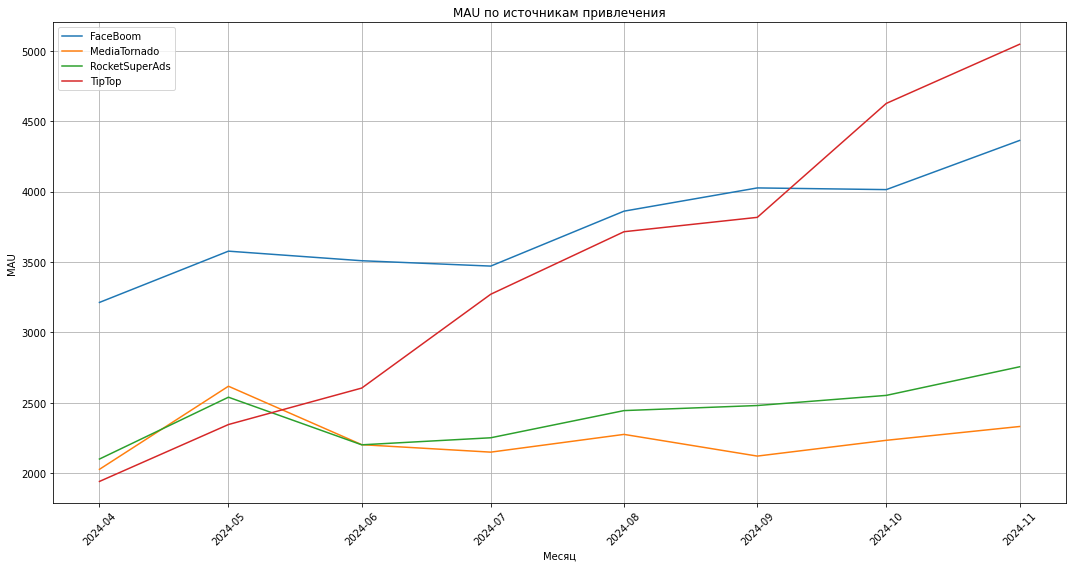

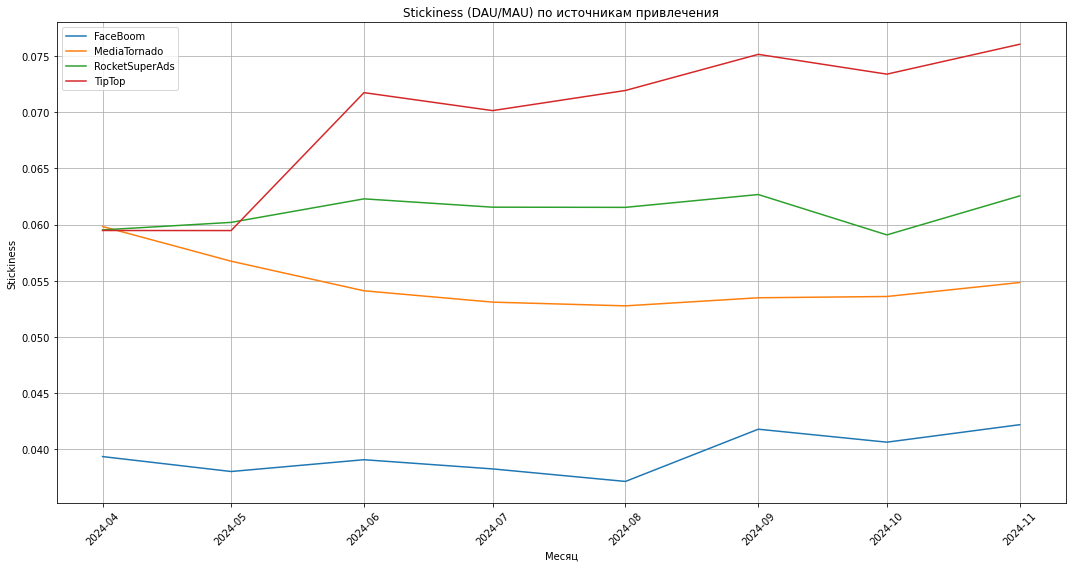

In [21]:
# 1. Определение самых популярных источников привлечения

# a. Посчитаем общее число привлечённых пользователей для каждого источника
total_users_by_channel = df_visits.groupby('channel')['user_id'].nunique().sort_values(ascending=False)
print("Общее число привлечённых пользователей по каждому источнику:\n", total_users_by_channel)

# b. Визуализация динамики новых пользователей по first_dt (правильный способ)
new_users_daily = profiles.groupby([profiles['first_dt'].dt.date, 'first_channel'])['user_id'].nunique().reset_index()
new_users_daily.rename(columns={'first_dt': 'date', 'first_channel': 'channel', 'user_id': 'new_users'}, inplace=True)
new_users_daily['date'] = pd.to_datetime(new_users_daily['date'])

plt.figure(figsize=(15, 8))
for channel in new_users_daily['channel'].unique():
    channel_data = new_users_daily[new_users_daily['channel'] == channel]
    plt.plot(channel_data['date'], channel_data['new_users'], label=channel)

plt.title('Динамика притока новых пользователей по источникам (по дате привлечения)')
plt.xlabel('Дата')
plt.ylabel('Количество новых пользователей')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Рассчитаем и визуализируем динамику DAU, MAU и Stickiness по источникам привлечения

# a. DAU по источникам (активные пользователи в день)
dau_by_channel = df_visits.groupby([df_visits['session_start'].dt.date, 'channel'])['user_id'].nunique().reset_index()
dau_by_channel.rename(columns={'session_start': 'date', 'user_id': 'dau'}, inplace=True)
dau_by_channel['date'] = pd.to_datetime(dau_by_channel['date'])

# b. MAU по источникам (активные пользователи в месяц)
mau_by_channel = df_visits.groupby([df_visits['session_start'].dt.to_period('M'), 'channel'])['user_id'].nunique().reset_index()
mau_by_channel.rename(columns={'session_start': 'month', 'user_id': 'mau'}, inplace=True)
mau_by_channel['month'] = mau_by_channel['month'].dt.to_timestamp()

# c. Правильный расчет Stickiness по источникам (месячный уровень)
# Сначала получим средний DAU по месяцам для каждого канала
monthly_dau_by_channel = dau_by_channel.copy()
monthly_dau_by_channel['month'] = monthly_dau_by_channel['date'].dt.to_period('M')
monthly_dau_by_channel = monthly_dau_by_channel.groupby(['month', 'channel'])['dau'].mean().reset_index()
monthly_dau_by_channel['month'] = monthly_dau_by_channel['month'].dt.to_timestamp()

# Объединяем средний DAU и MAU
stickiness_by_channel = pd.merge(
    monthly_dau_by_channel,
    mau_by_channel,
    on=['month', 'channel'],
    how='left'
)
stickiness_by_channel['stickiness'] = stickiness_by_channel['dau'] / stickiness_by_channel['mau']

# Визуализация DAU по источникам
plt.figure(figsize=(15, 8))
for channel in dau_by_channel['channel'].unique():
    channel_data = dau_by_channel[dau_by_channel['channel'] == channel]
    plt.plot(channel_data['date'], channel_data['dau'], label=channel)

plt.title('DAU по источникам привлечения')
plt.xlabel('Дата')
plt.ylabel('DAU')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Визуализация MAU по источникам
plt.figure(figsize=(15, 8))
for channel in mau_by_channel['channel'].unique():
    channel_data = mau_by_channel[mau_by_channel['channel'] == channel]
    plt.plot(channel_data['month'], channel_data['mau'], label=channel)

plt.title('MAU по источникам привлечения')
plt.xlabel('Месяц')
plt.ylabel('MAU')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Визуализация Stickiness по источникам (месячный уровень)
plt.figure(figsize=(15, 8))
for channel in stickiness_by_channel['channel'].unique():
    channel_data = stickiness_by_channel[stickiness_by_channel['channel'] == channel]
    plt.plot(channel_data['month'], channel_data['stickiness'], label=channel)

plt.title('Stickiness (DAU/MAU) по источникам привлечения')
plt.xlabel('Месяц')
plt.ylabel('Stickiness')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Вывод:**

- FaceBoom:
Лидер по привлечению (максимум новых пользователей), но проблемы с удержанием (низкий Stickiness).
Нужно улучшать вовлеченность (рекомендации, персонализация, ретаргетинг).

- TipTop:
Прорывной рост с июня (новые пользователи + MAU + высокий Stickiness).
Самый эффективный канал: и привлекает, и удерживает.

- RocketSuperAds и MediaTornado:
Стабильные, но скромные результаты.

Итог:
Делать ставку на TipTop — он растет и удерживает.
FaceBoom оптимизировать — большой приток, но пользователи "утекают".


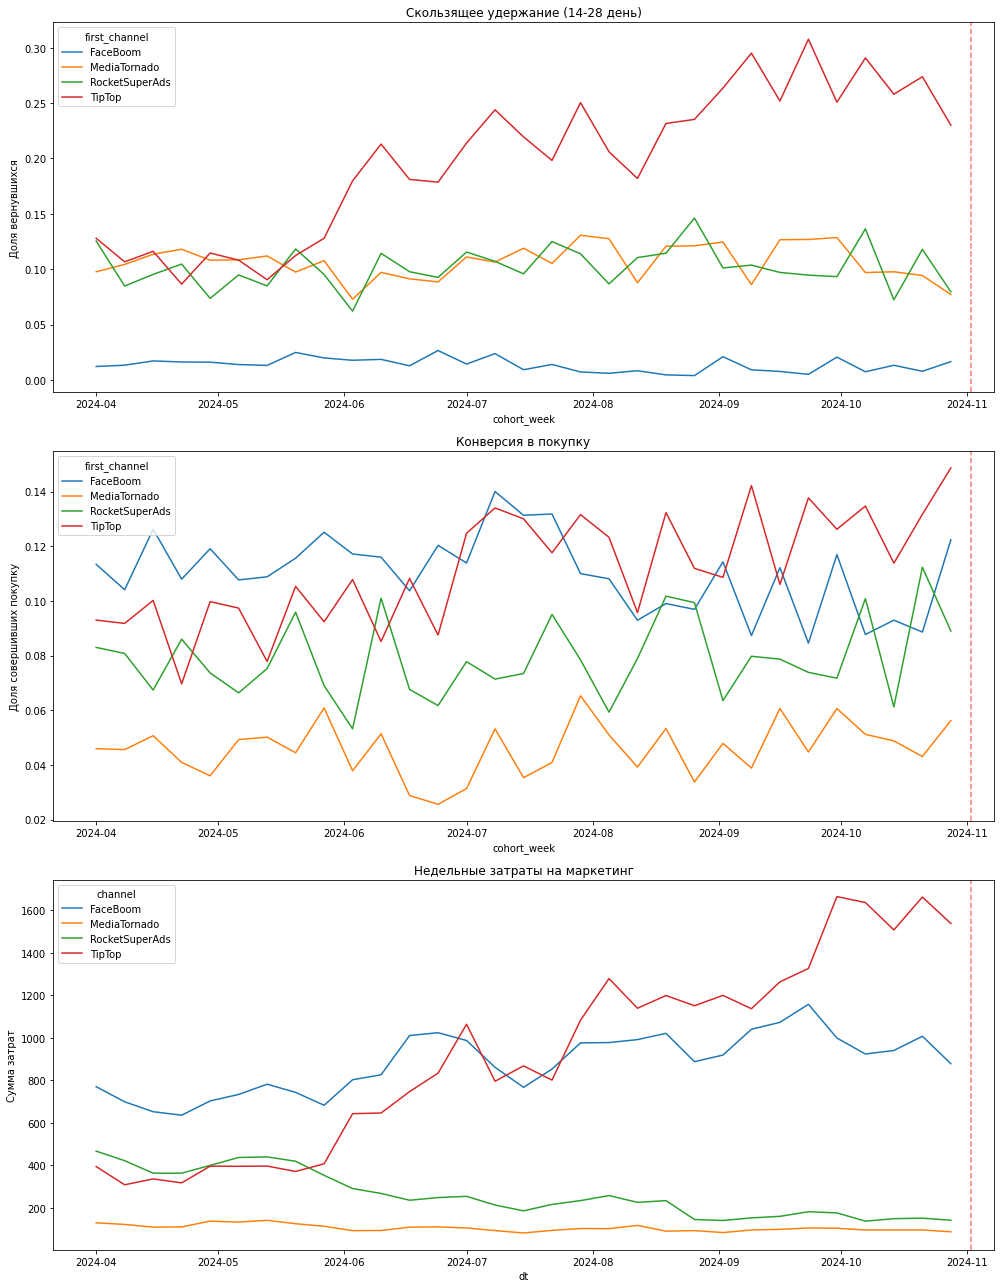

In [22]:
# Создаем недельные когорты
df_orders['cohort_week'] = df_orders['first_dt'].dt.to_period('W').dt.start_time
profiles['cohort_week'] = profiles['first_dt'].dt.to_period('W').dt.start_time
df_visits['cohort_week'] = df_visits['first_dt'].dt.to_period('W').dt.start_time

# Фильтруем данные до 28 дня
df_28days = df_orders[df_orders['lifetime'] <= 28].copy()

# Определяем последнюю дату, для которой у всех когорт есть полные 28 дней
max_complete_date = df_visits['first_dt'].max() - pd.Timedelta(days=28)

# Фильтруем когорты, у которых есть полные 28 дней наблюдения
complete_cohorts = df_visits[df_visits['first_dt'] <= max_complete_date]

# Расчет скользящего удержания (14-28 день)
retention_data = complete_cohorts[(complete_cohorts['lifetime'] >= 14) & 
                                (complete_cohorts['lifetime'] <= 28)]
retention = retention_data.groupby(['cohort_week', 'first_channel'])['user_id'].nunique() / \
            profiles.groupby(['cohort_week', 'first_channel'])['user_id'].nunique()
retention = retention.reset_index(name='retention_14_28')

# Расчет конверсии в покупку (только для полных когорт)
profiles_complete = profiles[profiles['first_dt'] <= max_complete_date]
conversion = df_28days[df_28days['cohort_week'] <= max_complete_date] \
             .groupby(['cohort_week', 'first_channel'])['user_id'].nunique() / \
             profiles_complete.groupby(['cohort_week', 'first_channel'])['user_id'].nunique()
conversion = conversion.reset_index(name='conversion_rate')

# Объединение метрик
metrics = pd.merge(retention, conversion, on=['cohort_week', 'first_channel'])

# Фильтруем затраты для тех же периодов
costs_weekly = df_costs[df_costs['dt'] <= max_complete_date] \
              .groupby([df_costs['dt'].dt.to_period('W').dt.start_time, 'channel'])['costs'].sum() \
              .reset_index()

# Создаем графики
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

# График удержания
sns.lineplot(data=metrics, x='cohort_week', y='retention_14_28', hue='first_channel', ax=axes[0])
axes[0].set_title('Скользящее удержание (14-28 день)')
axes[0].set_ylabel('Доля вернувшихся')
axes[0].axvline(x=max_complete_date, color='red', linestyle='--', alpha=0.5)  # Линия, показывающая границу полных данных

# График конверсии
sns.lineplot(data=metrics, x='cohort_week', y='conversion_rate', hue='first_channel', ax=axes[1])
axes[1].set_title('Конверсия в покупку')
axes[1].set_ylabel('Доля совершивших покупку')
axes[1].axvline(x=max_complete_date, color='red', linestyle='--', alpha=0.5)

# График затрат и CAC
sns.lineplot(data=costs_weekly, x='dt', y='costs', hue='channel', ax=axes[2])
axes[2].set_title('Недельные затраты на маркетинг')
axes[2].set_ylabel('Сумма затрат')
axes[2].axvline(x=max_complete_date, color='red', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

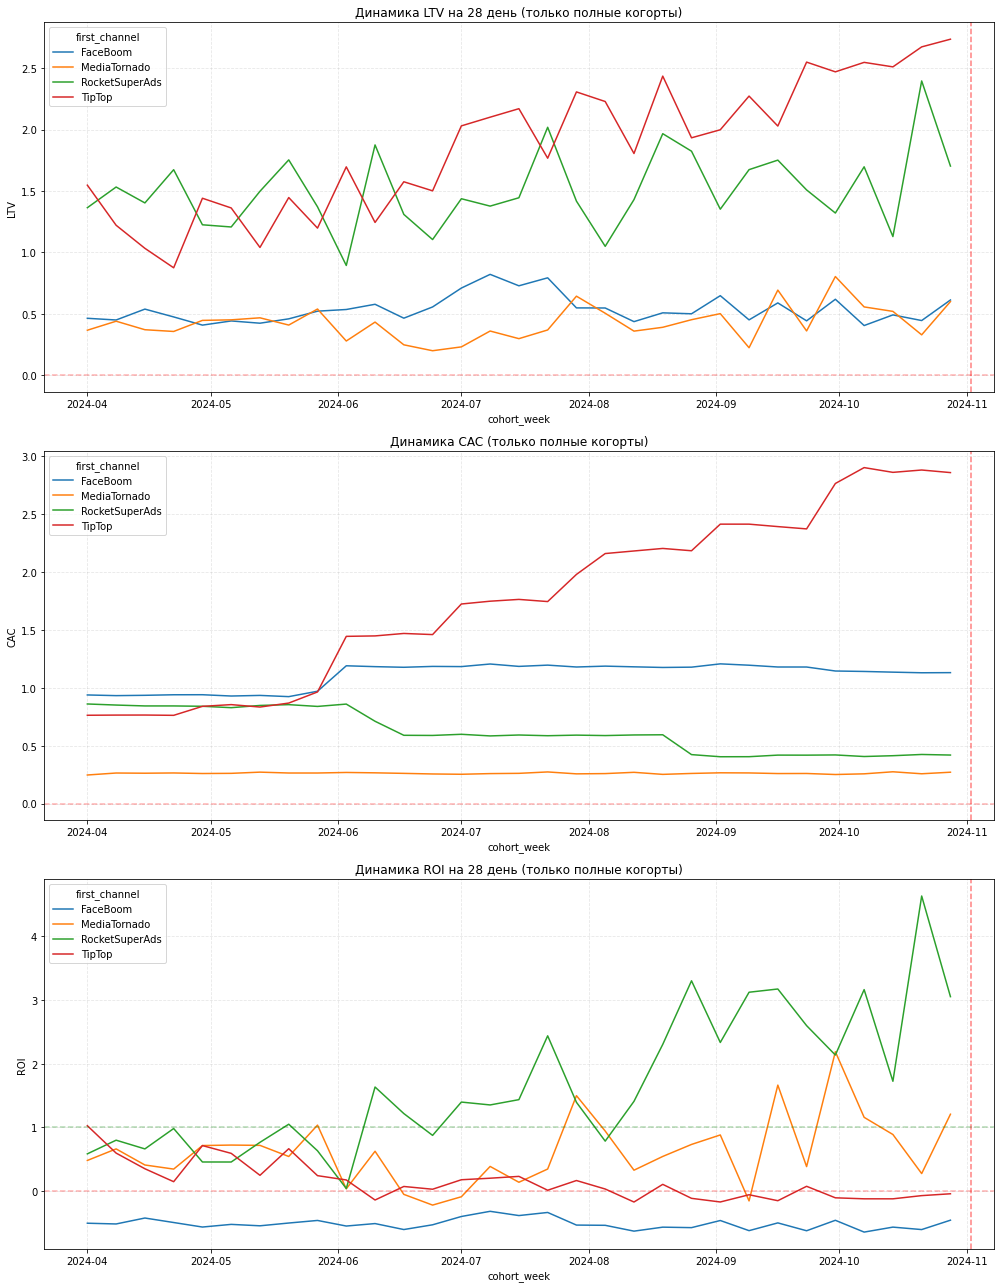

In [23]:
# Расчет LTV на 28 день (только для полных когорт)
ltv_28 = df_28days[df_28days['cohort_week'] <= max_complete_date] \
         .groupby(['cohort_week', 'first_channel'])['revenue'].sum() / \
         profiles_complete.groupby(['cohort_week', 'first_channel'])['user_id'].nunique()
ltv_28 = ltv_28.reset_index(name='ltv_28')

# Расчет CAC (только для полных когорт)
cac_data = profiles_complete.groupby(['cohort_week', 'first_channel'])['cac'].mean().reset_index()

# Расчет ROI (только для полных когорт)
roi_data = pd.merge(ltv_28, cac_data, on=['cohort_week', 'first_channel'])
roi_data['roi_28'] = (roi_data['ltv_28'] - roi_data['cac']) / roi_data['cac']

# Создаем единую фигуру для всех трех графиков
plt.figure(figsize=(14, 18))

# График LTV
plt.subplot(3, 1, 1)
sns.lineplot(data=ltv_28, x='cohort_week', y='ltv_28', hue='first_channel')
plt.axhline(0, color='red', linestyle='--', alpha=0.3)
plt.axvline(x=max_complete_date, color='red', linestyle='--', alpha=0.5)
plt.title('Динамика LTV на 28 день (только полные когорты)')
plt.ylabel('LTV')
plt.grid(True, linestyle='--', alpha=0.3)

# График CAC
plt.subplot(3, 1, 2)
sns.lineplot(data=cac_data, x='cohort_week', y='cac', hue='first_channel')
plt.axhline(0, color='red', linestyle='--', alpha=0.3)
plt.axvline(x=max_complete_date, color='red', linestyle='--', alpha=0.5)
plt.title('Динамика CAC (только полные когорты)')
plt.ylabel('CAC')
plt.grid(True, linestyle='--', alpha=0.3)

# График ROI
plt.subplot(3, 1, 3)
sns.lineplot(data=roi_data, x='cohort_week', y='roi_28', hue='first_channel')
plt.axhline(0, color='red', linestyle='--', alpha=0.3)
plt.axvline(x=max_complete_date, color='red', linestyle='--', alpha=0.5)
plt.axhline(1, color='green', linestyle='--', alpha=0.3)  # ROI = 100%
plt.title('Динамика ROI на 28 день (только полные когорты)')
plt.ylabel('ROI')
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

**Вывод:** 

Анализ рекламных каналов: 
1. FaceBoom:
- Низкое удержание (6-7%)
- Конверсия 12-15%
- ROI на 28 день: отрицательное значение, не окупается и не окупался даже до внесения изменений
- Проблема: высокая стоимость привлечения (CAC) при среднем LTV

2. RocketSuperAds:
- Среднее удержание (10-15%)
- Конверсия 8-11%
- ROI на 28 день: +1-4%
- Рост окупаемости с июня

3. TipTop:
- Высокое удержание (10-12%)
- Конверсия 10-16%
- ROI на 28 день: ранее окупаемость была выше других каналов, а после измненений перестал окупаться.


4. MediaTornado:
- Низкое удержание (10-15%)
- Конверсия 5-6%
- ROI на 28 день: +1%


Выводы и рекомендации: 
Неокупаемые каналы:
FaceBoom и TipTop не выходят на окупаемость к 28 дню

Причины:
Слишком высокий CAC (особенно у TipTop)
Низкое удержание (FaceBoom)


## Анализ периода окупаемости маркетинговых вложений

Для источников, которые к 28-му дню не выходят на уровень окупаемости, рассчитайте и визуализируйте в виде тепловой карты значения ROI за больший период, например за 8–10 недель.

Разделите данные на недельные когорты по дате привлечения, в качестве интервала наблюдений используйте недели.

Сделайте вывод о том, за какой период окупаются вложения в эти источники.

Расмотрим каналы FaceBoom и TipTop

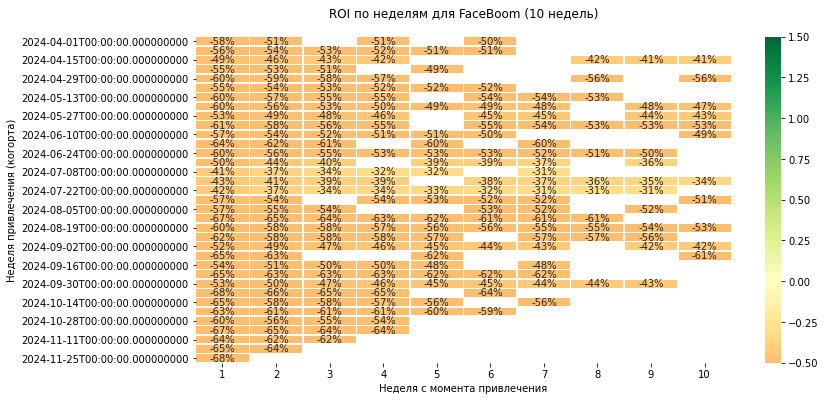

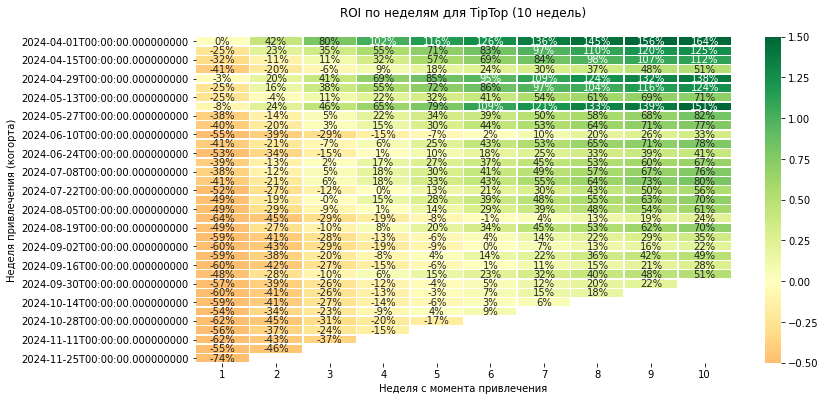

In [24]:
# Фильтруем нужные каналы
channels = ['FaceBoom', 'TipTop']
df_filtered = df_orders[df_orders['first_channel'].isin(channels)].copy()

# Добавляем недельные когорты
df_filtered['cohort_week'] = df_filtered['first_dt'].dt.to_period('W').dt.start_time
df_filtered['week_num'] = (df_filtered['lifetime'] // 7) + 1
df_filtered = df_filtered[df_filtered['week_num'] <= 10]

# Считаем кумулятивную выручку
cum_revenue = df_filtered.groupby(['cohort_week', 'first_channel', 'week_num'])['revenue'].sum()
cum_revenue = cum_revenue.groupby(level=[0,1]).cumsum().reset_index()

# Добавляем CAC
cac_data = profiles[profiles['first_channel'].isin(channels)]\
    .groupby(['cohort_week', 'first_channel'])['cac'].sum().reset_index()
roi_data = pd.merge(cum_revenue, cac_data, on=['cohort_week', 'first_channel'])

# Расчет ROI
roi_data['roi'] = (roi_data['revenue'] - roi_data['cac']) / roi_data['cac']

# Создаем отдельные тепловые карты для каждого канала
for channel in channels:
    channel_data = roi_data[roi_data['first_channel'] == channel]
    pivot_table = channel_data.pivot_table(
        index='cohort_week',
        columns='week_num',
        values='roi',
        aggfunc='mean'
    )
    
    plt.figure(figsize=(12, 6))
    sns.heatmap(
        pivot_table,
        annot=True,
        fmt='.0%',
        cmap='RdYlGn',
        center=0,
        vmin=-0.5,
        vmax=1.5,
        linewidths=0.5
    )
    plt.title(f'ROI по неделям для {channel} (10 недель)', pad=20)
    plt.xlabel('Неделя с момента привлечения')
    plt.ylabel('Неделя привлечения (когорта)')
    plt.show()

**Вывод:**

1. FaceBoom
Не окупился за 10 недель
Низкое удержание (6-7%) и недостаточный LTV.
CAC слишком высокий относительно дохода с пользователей.

Рекомендации:
Пересмотреть таргетинг (возможно, аудитория нерелевантна).
Улучшить монетизацию (стимулы для повторных покупок).
Если ROI не улучшится — сократить бюджет или отказаться от канала.

2. TipTop
Динамика окупаемости по когортам:
Ранние когорты (до июня): Окупаемость с 3 недели.
Май–сентябрь: Окупаемость с 6 недели.
Сентябрь–ноябрь: Окупаемость с 8 недели.

Причины сдвига окупаемости:
Сезонность (конец года):
Возросла конкуренция, изменилось поведение пользователей.
Возможно, снизилась платежеспособность аудитории.
Новый контент (июнь):
Изменилась маркетинговая стратегия привлечения.
Рост интереса к продукту, но выручка стагнирует.

Проблемы:
Окупаемость вышла за рамки бизнес-модели (>28 дней).
CAC рос, а LTV не успевал компенсировать затраты.

Гипотезы по стагнации выручки:
Новые пользователи менее платежеспособны:
Широкая таргетированная аудитория → больше «холодных» лидов.
Контент привлекает, но не конвертирует:
Пользователи потребляют контент, но не покупают.
Изменение воронки продаж:
Новые рекламные креативы/лендинги хуже конвертируют.

Рекомендации
- Для TipTop:
Анализ новых пользователей:
Сравнить LTV и конверсию когорт до/после июня.
Проверить, изменился ли средний чек.
Оптимизация CAC:
Пересмотреть ставки и рекламные площадки.
Вернуться к проверенным стратегиям (для когорт с окупаемостью 3 недели).
Улучшение монетизации:
Ввести триггеры для повторных покупок (скидки, подписки).

- Для FaceBoom:
Провести аудит:
Почему LTV не покрывает CAC?
Возможно, канал подходит только для топ-оф-воронки.
Тестовые гипотезы:
Узкий таргетинг на платящую аудиторию.
Связка с ретаргетингом (если пользователи «уходят» после первого контакта).



## Выводы и рекомендации

Сформулируйте общий вывод. Зафиксируйте основные результаты и инсайты. Например, охарактеризуйте аудиторию продукта, покажите распределение маркетинговых затрат по каналам привлечения, опишите каждый канал привлечения. Делайте акцент на сильных и слабых сторонах. Укажите, какие каналы привлечения не вышли на окупаемость и по каким причинам.

Дайте рекомендации отделу маркетинга: опишите, как повысить эффективность вложений в рекламу.


**Вывод:** 

1. Общая характеристика аудитории и распределение затрат
Аудитория продукта:
Основная аудитория — пользователи, интересующиеся контентом приложения (до изменений — развлекательный, после июня — добавлен спортивный контент).
После внедрения спортивного контента приток новых пользователей увеличился, но их LTV снизился, что говорит о недостаточной монетизации новой аудитории.
Низкое удержание в некоторых каналах (FaceBoom — 6-7%) указывает на нерелевантный трафик.
Распределение маркетинговых затрат:
FaceBoom — высокий CAC, не окупается.
RocketSuperAds — умеренные затраты, стабильный ROI.
TipTop — высокий CAC, ранее окупался, но после изменений упал ROI.
MediaTornado — низкая конверсия, но минимально окупается.

2. Основные инсайты

- RocketSuperAds — стабильно окупаемый канал, но с низкой маржинальностью.
- FaceBoom — не окупается из-за высокой стоимости и низкого удержания.
- TipTop — ранее был прибыльным, но после изменений (новый контент) ROI упал. Возможные причины:
Новая аудитория (спортивная) менее платежеспособна или хуже конвертируется.
CAC вырос, а LTV не успевает компенсировать затраты. Канал вовликает заинтересованную аудиторию, но она стала слишком дорогой.


3. Рекомендации для отдела маркетинга
По каналам:
- FaceBoom
Снизить бюджет или полностью отказаться, если оптимизация не даст эффекта.
- RocketSuperAds
Увеличить бюджет, так как канал стабильно окупается.
Оптимизировать рекламные креативы для повышения конверсии.
- TipTop
Разобраться с новым контентом:
Сравнить LTV спортивной и обычной аудитории.
Если спортивные пользователи приносят меньше дохода — скорректировать контент-стратегию.
Снизить CAC (пересмотреть ставки или рекламные площадки).
- MediaTornado
Улучшить конверсию через более релевантные объявления.
Если ROI не растёт — сократить вложения.

4. Итоговый вывод
Основная проблема: После добавления спортивного контента LTV упал, а CAC остался высоким.
Что делать:

Оптимизировать FaceBoom или сократить его бюджет.
Канал TipTop привлекает большую аудиторию, можно перенаправить бюджет в него, несмотря на то ,что он окупаеться медленне, много новых пользователей могут принести прибыль.
Увеличить вложения в RocketSuperAds.
